<div style="text-align: right; font-style: italic"> 
    Team Slytherins <br>
    Fahmeen Mazhar, Maira Sohail, Rimsha Saeed
</div>

## <center> Net Hourly Electrical Power Output Prediction in a Combined Cycle Power Plant </center>

### Dataset Attributes
The dataset is open source, found <a href="https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant"> here</a>, and contains **9568** data points collected from a *Combined Cycle Power Plant* over 6 years (2006-2011), when the power plant was set to work with full load.
Features consist of hourly average ambient variables, namely
- Temperature (T) in °C, 
- Ambient Pressure (AP) in milibar, 
- Relative Humidity (RH) in percentage, and 
- Exhaust Vacuum (V) in cm Hg

The target is to predict the net hourly electrical energy output (EP) of the plant in MegaWatts.

## Step I: Importing required modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score

## Step II: Importing dataset, exploratory data analysis

#### Reading the dataset

In [2]:
df = pd.read_csv("ccpp.csv")

#### Printing first five data samples

In [3]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


#### Printing dataset properties

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


#### Generating descriptive statistics for the dataset

In [5]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


#### Sketching density distribution

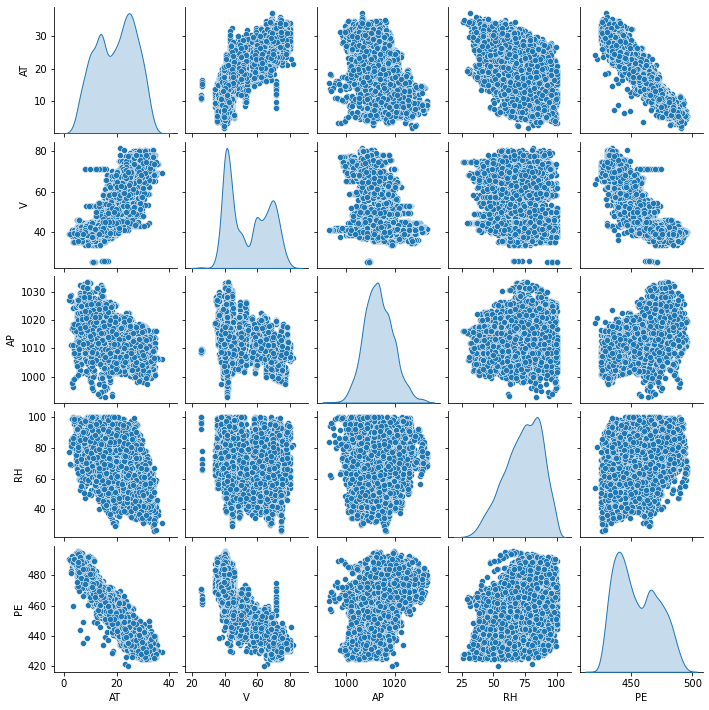

In [6]:
sns.pairplot(df, diag_kind='kde', height=2, aspect=1)
plt.show()

#### Visualizing *Linearity Trend* of independent variables with dependent variable

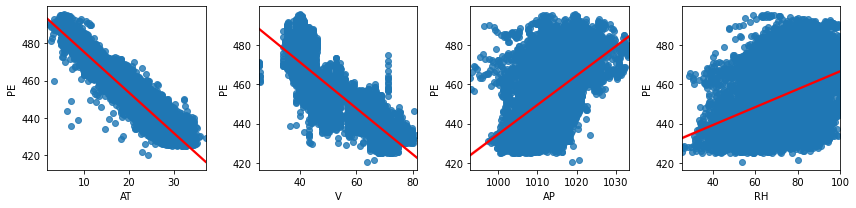

In [7]:
fig = plt.figure(figsize = (12,3))

for i in range(0, df.shape[1]-1):
    ax = fig.add_subplot(1, 4, i+1)
    sns.regplot(x=df.columns[i], y="PE", data=df, line_kws={"color": "red"})

plt.tight_layout()
plt.savefig('pairplot.jpg',dpi=1200, bbox_inches='tight')

plt.show()

#### Visualizing correlation

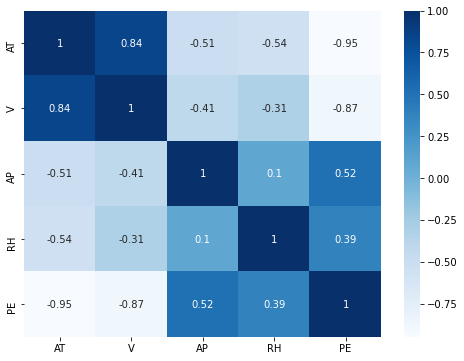

In [8]:
fig = plt.figure(figsize = (8, 6))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

## Step III: Preprocessing

#### Extracting features and targets

In [9]:
X = df.iloc[:, :-1].values                   # features
y = df.iloc[:, -1].values.reshape(-1, 1)     # target

#### Scaling the features in the range of [0, 1]

In [10]:
scaler = MinMaxScaler(feature_range = (0,1))
X = scaler.fit_transform(X)

#### Splitting the data into Training set and Test set

In [11]:
# train test ratio - 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Print data dimensions
print("Training set: \nFeatures:", np.shape(X_train), "Targets:", np.shape(y_train))
print("\nTest set: \nFeatures:", np.shape(X_test), "Targets:", np.shape(y_test))

Training set: 
Features: (6697, 4) Targets: (6697, 1)

Test set: 
Features: (2871, 4) Targets: (2871, 1)


## Step IV: Building Machine Learning Models

#### Multiple Linear Regression model

In [12]:
# Create ML model instance
MLR = LinearRegression()

# Model fitting
MLR.fit(X_train, y_train)

# Making predictions
y_pred_MLR = MLR.predict(X_test)

#### Support Vector Regression model

In [13]:
# Create ML model instance
svr = SVR()

# Model fitting
svr.fit(X_train, y_train.ravel())

# Making predictions
y_pred_svr = svr.predict(X_test).reshape(-1, 1)

#### Random Forest Regression Model

In [14]:
# Create ML model instance
RF = RandomForestRegressor(n_estimators = 10, random_state = 0)

# Model fitting
RF.fit(X_train, y_train.ravel())

# Making predictions
y_pred_RF = RF.predict(X_test).reshape(-1, 1)

#### K-Nearest Neighbors Regression Model

In [15]:
# Create ML model instance
knn = KNeighborsRegressor()

# Model fitting
knn.fit(X_train, y_train)

# Making predictions
y_pred_knn = knn.predict(X_test)

## Step V: Performance Evaluation

#### Actual vs. Predicted Results

In [16]:
# Combine all true and predicted targets
results = np.concatenate((y_test, y_pred_MLR, y_pred_svr, y_pred_RF, y_pred_knn), axis = 1)

# Create a dataframe
R = pd.DataFrame(results, columns = ['Actual', 'MLR', 'SVR', 'RF', 'KNN'])

# Print first 10 values
R.head(10)

,Actual,MLR,SVR,RF,KNN
0,431.23,431.402451,433.971064,433.708,433.260
1,460.01,458.614741,457.455937,457.456,457.022
2,461.14,462.819674,461.871024,463.690,463.484
3,445.90,448.601237,448.299942,446.756,446.000
4,451.29,457.879479,457.098444,461.345,458.620
5,432.68,429.676856,433.221474,435.888,435.688
6,477.50,473.017115,474.725485,473.259,474.142
7,459.68,456.532373,456.025229,458.451,456.698
8,477.50,474.342524,475.576443,471.527,478.102
9,444.99,446.364396,442.771364,442.157,441.588


#### Model performance

In [17]:
# ML models
models = ['Multiple Linear Regression', 'Support Vector Regression', 
          'Random Forest Regression', 'K-Nearest Neighbors Regression']
model_instance = [MLR, svr, RF, knn]

# Predictions drawn
y_pred = [y_pred_MLR, y_pred_svr, y_pred_RF, y_pred_knn]

# Performance evaluation loop
for i in range(0, len(models)):
    print(models[i])
    print("Mean Absolute Error = ", mean_absolute_error(y_test, y_pred[i]))
    print("Mean Squared Error = ", mean_squared_error(y_test, y_pred[i]))
    print("Root Mean Squared Error = ", (mean_squared_error(y_test, y_pred[i]))**0.5)
    print("R-Squared = ", r2_score(y_test, y_pred[i]), '\n')

Multiple Linear Regression
Mean Absolute Error =  3.598266124779354
Mean Squared Error =  20.368383002885913
Root Mean Squared Error =  4.513134498647909
R-Squared =  0.9304112159477682 

Support Vector Regression
Mean Absolute Error =  3.196791269513175
Mean Squared Error =  17.357916342781074
Root Mean Squared Error =  4.16628327682853
R-Squared =  0.9406965053728933 

Random Forest Regression
Mean Absolute Error =  2.585423894113549
Mean Squared Error =  12.234531647509579
Root Mean Squared Error =  3.497789537337771
R-Squared =  0.9582006003776485 

K-Nearest Neighbors Regression
Mean Absolute Error =  2.7958739115290845
Mean Squared Error =  14.039791547196105
Root Mean Squared Error =  3.746970982966922
R-Squared =  0.9520329118920363 



## Step VI: 10-fold Cross-Validation

In [18]:
# Initialize an array of zeros to store predicted values
CV_pred = np.zeros((np.shape(y)[0], 4))

for i in range(0, len(models)):
    # Cross validated predictions
    CV_pred[:, i] = cross_val_predict(model_instance[i], df, y.ravel(), cv = 10)
    
    # Evaluation metrics
    cv_MAE = cross_val_score(model_instance[i], X, y.ravel(), scoring = 'neg_mean_absolute_error', cv=10)
    cv_MSE = cross_val_score(model_instance[i], X, y.ravel(), scoring = 'neg_mean_squared_error', cv=10)
    cv_RMSE = abs(cv_MSE)**0.5
    cv_r2score = cross_val_score(model_instance[i], X, y.ravel(), scoring = 'r2', cv=10)
    
    # Printed averaged results
    print(models[i])
    print("Average MAE: ", abs(cv_MAE.mean()))
    print("Average MSE: ", abs(cv_MSE.mean()))
    print("Average RMSE: ", cv_RMSE.mean())
    print("Average R-squared: ", cv_r2score.mean(), '\n')

Multiple Linear Regression
Average MAE:  3.62786188243413
Average MSE:  20.793875111034232
Average RMSE:  4.556585045760783
Average R-squared:  0.9285245252500409 

Support Vector Regression
Average MAE:  3.157806073053007
Average MSE:  17.360371462326846
Average RMSE:  4.163614805460648
Average R-squared:  0.9403123521770169 

Random Forest Regression
Average MAE:  2.4329963826331418
Average MSE:  11.81313189916504
Average RMSE:  3.4312832280722008
Average R-squared:  0.9593942187651756 

K-Nearest Neighbors Regression
Average MAE:  2.688650416223992
Average MSE:  13.944028127522373
Average RMSE:  3.7312458913672515
Average R-squared:  0.952062398647179 



#### Actual power output vs CV-predictions

In [19]:
cv_result =  pd.DataFrame(np.concatenate((y, CV_pred), axis=1), columns = ['Actual', 'MLR', 'SVR', 'RF', 'KNN'])

# Print first 10 values
cv_result.head(10)

,Actual,MLR,SVR,RF,KNN
0,463.26,463.26,460.259713,463.277,462.750
1,444.37,444.37,446.355627,444.368,444.406
2,488.56,488.56,471.469402,488.583,488.788
3,446.48,446.48,449.688694,446.488,446.662
4,473.90,473.90,466.307045,473.895,474.112
5,443.67,443.67,446.191324,443.673,442.878
6,467.35,467.35,460.544100,467.335,466.494
7,478.42,478.42,464.632676,478.424,477.848
8,475.98,475.98,461.128792,476.008,472.322
9,477.50,477.50,464.352683,477.501,477.294


### *Done!*